## Table Of Content:

* [Linear Regression With Multiple Variable](#)

 * [1.The house pricing problem with multiple features](#1) 
 * [2.A multivariate version of the hypothesis function](#2)
 * [3.A multivariate version of the gradient descent function](#3)
 * [4.How to optimize the gradient descent algorithm](#4)
 * [5.Feature scaling](#5)
 * [5.1.Min-max scaling](#5.1)
 * [6.Debug the gradient descent to make sure it is working properly](#6)
 * [7.Choose the best values for $\alpha$ ](#7)
 * [8.Over-fitting & Regularization](#8)
 * [9.How to limit over-fitting ?](#9)
 * [10.A regularized cost function](#10)
 * [11.Regularized linear regression](#11)
 * [12.Linear regression with multiple variables ](#12)
 * [12.1 Data segregations](#12.1)
 * [12.2 Feature scaling ](#12.2)
 * [References](#13)

## Linear Regression With Multiple Variable<a class="anchor" id="0"></a>

Up till now We've played with [Simple linear regression](https://github.com/AnilSarode/Machine-Learning-Digital-Book-/blob/master/Simple%20Linear%20Regression/Simple%20Linear%20Regression%20.ipynb) based on a single variable. In the original version of the algorithm initially we had given an example for single input feature x (the size of the house in the house pricing problem) that we used to predict the output y (the price of the house). We eventually ended up with a hypothesis function for such problem:

hypothesis:
$$
\begin{aligned}\ h_{\theta}(x)={\theta}_0 +{\theta}_1x \end{aligned}
$$

Now you may think like this:

1. What if We have Multiple features?  
2. How does the hypothesis will change?

    It's now time to introduce a more powerful version that works with multiple variables called multivariate linear regression, where the term multivariate is a fancy word for more than one variable.
       

## 1.The house pricing problem with multiple features <a class="anchor" id="1"></a>

You surely need more than one feature in order to better predict the price of a house, like for example the number of rooms, the number of floors, the age of the house itself and so on. Those are your new input features $x$. Being more than one, we need to update the notation a little bit.



| Size($feet^2$) | Number of Bedrooms |Number of floor| Age (Years)    | Price($ 1000)     |
|----------------|--------------------|---------------|----------------|-------------------|
|    2104        |         5          |      1        |   45           |   460             |
|    1416        |         3          |      2        |   40           |   232             |
|    1534        |         3          |      2        |   30           |   315             |
|    852         |         2          |      1        |   36           |   178             |
|    ....        |        ...         |      ..       |   ..           |   ...             |

**Notations:**

In [Simple Linear Regression](https://github.com/AnilSarode/Machine-Learning-Digital-Book-/blob/master/Simple%20Linear%20Regression/Simple%20Linear%20Regression%20.ipynb) under the heading **Linear Regression with one variable: Cost Function.** We had consider $m$ examples of features $x$.So there the vector $X$ of $x^{(1)}...x^{(m)}$.examples.

here 

This is what I'm going to use:

* $n$ — number of input features;
* $m$ — number of training examples;
* $x_n$ — n-th input feature;
* $x^{(i)}$ — input feature of $i$-th training example;
* $x^{(i)}_j$ — value of feature $j$ in $i$-th training example;

Let me explain it a little bit. The lower-case $n$ is the number of input features, the number of **columns** in the table above. There are four input features here, so $n=4$. As in the univariate version, $m$ denotes the number of training examples, that is the number of rows in the table above.

The $n$-th input feature is written as $x_n$. For example: ${x_1}$ is the **size of the house**, $x_4$ is the **age** of the house. The output variable is still one, so it remains $y$ with no subscript.

We will be writing $x^(i)$ to refer to all the values of a specific training example, i.e. the $i$-th row in the table. Being more than one input values, the result turns out to be a vector. For example, I grab the values of the third training example:

$$
x^{(3)}=
\begin{bmatrix}
1534\\
3\\
2\\
30
\end{bmatrix}
$$
Being $x^{(i)}$ a vector, We'll use $x^{(i)}_j$ to refer to a specific value of that vector. For example $x^{(3)}_4=30$.

## 2.A multivariate version of the hypothesis function<a class="anchor" id="2"></a>


The original, univariate hypothesis function was like:

$$
h_{\theta}(x)={\theta}_0 +{\theta}_1x 
$$ 

with one input variable x. Now it has to be updated in order to work with multiple inputs. It's going to be:

$$
h_{\theta}(x)={\theta}_0 +{\theta}_1x_1+{\theta}_2x_2+{\theta}_3x_3+....{\theta}_nx_n
$$ 

The magic is going to happen, thanks to that trick: any linear algebra wizard will now recognize the formula above as the inner product between two vectors ${\large\theta}$ and $X$ . In particular:

$$
{\large\theta}=
\begin{bmatrix}
{\theta}_0\\
{\theta}_1\\
{\theta}_2\\
\vdots\\
{\theta}_n
\end{bmatrix}
$$ 

$$
X=
\begin{bmatrix}
x_0\\
x_1\\
x_2\\
\vdots\\
x_n\\
\end{bmatrix}
$$

By definition of the inner product, the first argument ${\large\theta}$ must be a row vector. However our ${\large\theta}$ is a column vector. That's not a problem: just transpose it, that is make it a row (lay it down). A transposed vector is written as ${\large\theta}^T$, so We are ready to compress the hypothesis function as follows:

$$
h_{\theta}(x)={\large\theta}^TX 
$$

This notation will make the implementation way easier: computing the hypothesis function it's now just a matter of an inner product between two vectors, a simple task you can accomplish with any mathematical package of python.

Note here both Vector ${\large\theta}$ and $X$ both are $R^{n+1}$ dimension vectors,as we added ${\theta}_0$ and $x_0$.Also note that $x_0=1$ always. 


## 3.A multivariate version of the gradient descent function<a class="anchor" id="3"></a>

We've updated the hypothesis function to work with multiple input parameters.So we have

Hypothesis:
$$
h_{\theta}(x)={\theta}_0 +{\theta}_1x_1+{\theta}_2x_2+{\theta}_3x_3+....{\theta}_nx_n
$$ 

Parameters:
$$
{\large\theta}= {\theta}_0,{\theta}_1,{\theta}_2,{\theta}_3....{\theta}_n
$$
Cost function:
$$  
J({\theta}) = \frac{1}{2m} \sum_{i=1}^m(h_{\theta}(x^{(i)} )-y^{(i)})^2 
$$ 

It's just a matter of notation, as you may see. The equation stays the same.

Now for **Gradient descent algorithm for Linear Regression** with one variable $x_1$ as follows:

simultaneously update the the ${\theta}_0 $ and ${\theta}_1$

repeat until  converges 
{

$
\large {\theta}_0:={\theta}_0- \large\alpha\frac{1}{m} \sum_{i=1}^m(h_{\theta}(x^{(i)} )-y^{(i)})
$

$
\large {\theta}_1:={\theta}_1- \large\alpha\frac{1}{m} \sum_{i=1}^m(h_{\theta}(x^{(i)} )-y^{(i)})(x^{(i)}) 
$

}

Where 

$
\large\frac{\large\partial J({\large\theta})}{\large\partial {\theta}_0}= \frac{1}{m} \sum_{i=1}^m(h_{\theta}(x^{(i)} )-y^{(i)})
$.

and

$
\large\frac{\large\partial J({\large\theta})}{\large\partial {\theta}_1}= \frac{1}{m} \sum_{i=1}^m(h_{\theta}(x^{(i)} )-y^{(i)})x^{(i)}) 
$.

Now for **multiple variable linear regression the Gradient descent algorithm algorithm** is as

repeat until  converges 
{
 
$
\large {\theta}_j:={\theta}_j- \large\alpha\frac{\large\partial J({\large\theta})}{\large\partial {\theta}_j} 
$

}

Where we have a slightly different kind of derivative, that is:


$
\large\frac{\large\partial J({\large\theta})}{\large\partial {\theta}_j}= \frac{1}{m} \sum_{i=1}^m(h_{\theta}(x^{(i)} )-y^{(i)})x^{(i)}_j) 
$.

So the algorithm become as

simultaneously update the the ${\theta}_j $ for $ j= 0,....n $

repeat until  converges 
{
 
$
\large {\theta}_j:={\theta}_j- \large\alpha\frac{1}{m} \sum_{i=1}^m(h_{\theta}(x^{(i)} )-y^{(i)})x^{(i)}_j) 
$

}

Remember to compute each value separately by storing ${\theta}s$ in temporary variables, as we did for the univariate version. The unrolled loop would look like the following:


repeat until  converges 
{

$
\large {\theta}_0:={\theta}_0- \large\alpha\frac{1}{m} \sum_{i=1}^m(h_{\theta}(x^{(i)} )-y^{(i)})(x^{(i)}_0) 
$

$
\large {\theta}_1:={\theta}_1- \large\alpha\frac{1}{m} \sum_{i=1}^m(h_{\theta}(x^{(i)} )-y^{(i)})(x^{(i)}_1) 
$

$
\large {\theta}_2:={\theta}_2- \large\alpha\frac{1}{m} \sum_{i=1}^m(h_{\theta}(x^{(i)} )-y^{(i)})(x^{(i)}_2) 
$

...

$
\large {\theta}_n:={\theta}_n- \large\alpha\frac{1}{m} \sum_{i=1}^m(h_{\theta}(x^{(i)} )-y^{(i)})(x^{(i)}_n) 
$

}

**Importantly note** that the value of $j$ varies from $0$ to $n$ and i.e. n decide the number of features and for each feature the value of $i$ is varies from $1$ to $m$ which is number of examples for those features or the size of the data set/points.

## 4.How to optimize the gradient descent algorithm <a class="anchor" id="4"></a>

Real-world data can come up in different orders of magnitude. For example, your age ranges from $0$ to $100$ years, while your yearly income from $€10,000$ to $€10,000,000$ (and more). Using such unprocessed data as input features for a linear regression system might slow down the gradient descent algorithm to a crawl.

It happens because — as we will see shortly — such not normalized data warps the cost function the gradient descent has to process, making the minimum point really difficult to reach.

Because of that, an important trick in machine learning and in linear regression is to make sure that all the input features are on a similar scale. This is a preparatory step you do in order to optimize the input data, known as **feature scaling.**

## 5.Feature scaling  <a class="anchor" id="5"></a>

In feature scaling you basically normalize your input values. For example, say you have two features:

* x1 as the yearly income (10,000-10,000,000);
* x2 as the age (0-100).

Below you will find a contour plot for the cost function $J({\theta}_0,{\theta}_1)$ as if we were using the raw, unprocessed values. As you may see the result is a very thin and stretched version of it. The gradient descent algorithm would oscillate a lot back and forth, taking a long time before finding its way to the minimum point.

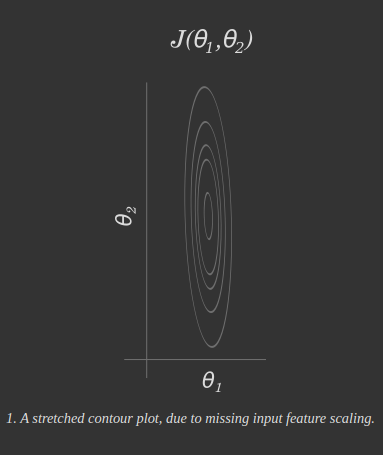

In [1]:
from IPython.display import Image
Image("/home/anil/ML/ML_1/Machine-Learning-Digital-Book-/Linear Regression With Multiple Variable/skewed.png",width=300,height=200)


With feature scaling we will bring back the original bowl-shaped figure in order to let the gradient descent algorithm do its job efficiently. You have to options here: min-max scaling or standardization.

## 5.1.Min-max scaling <a class="anchor" id="5.1"></a>

The idea is to get every input feature into approximately a $[−1,1] $range. The name comes from the use of min and max functions, namely the smallest and greatest values in your dataset. It requires dividing the input values by the range (i.e. the maximum value minus the minimum value) of the input variable

$$
{x'}_i=\frac{x_i-min(x_i)}{max(x_i)-min(x_i)}
$$

where $x_i$ is the original $i$-th input value, ${x′}_i$ is the normalized version.

For example, say we are dealing with the yearly income $x_1$ and in particular we want to normalize the value of $x_1={$30,000:}$. So we have max value of the income as $10,000,000$ and min value as $10,000 $

$$
{x'}_i=\frac{30,000-10,000}{10,000,000-10,000}\approx0.02
$$

Just rinse and repeat such normalization for every value in your dataset. Of course if you are in a multivariate scenario remember to skip feature $x_0$, since $x_0=1$. 

## 5.2.Standardization <a class="anchor" id="5.2"></a>

This technique goes also under the name of **Mean normalization** and many other confusing aliases I wish I could forget. In brief, you transform your data set so that the values follow the property of a normal distribution, namely with mean $0$($\mu=0$) and standard deviation 1 $(\sigma=1)$. Unlike min-max scaling, with standardization you are thinking in terms of how many standard deviations a value is far from the mean of the entire data set.

The general formula for standardization:

$$
x_i = \frac{x_i-\mu}{\sigma}
$$

We'll show you an example with the yearly income $x_1$. Suppose We have collected five samples: ${$10,000}$, ${$30,000}$, ${$32,000}$, ${$35,000}$, ${$150,000}$. The mean and the standard deviation are:
$$
\mu= 51,400
$$
$$
\sigma \approx 50,078
$$

Now, let's apply the standardization to the value of ${$30,000}$ as We did before with the min-max scaling:

$$
x_1=\frac{30,000-51,400}{50,078}
$$

You can read it as $−0.4$ standard deviations $(−0.4STD)$ from the mean.

Rinse and repeat the procedure for every value in your dataset as for the min-max scaling, and remember to skip $x_0$ in multivariate problems.

Using standardization is important when you are comparing measurements that have different units, like years and dollars. It is also a general requirement for many machine learning algorithms besides linear regression. As a rule of thumb I'd say: when in doubt, just standardize the data, it shouldn't hurt.


Following example using [sklearn.preprocessing.StandardScale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler),we are illustrating what is **standardization** actually doing with data. StandardScaler standardizes a feature by subtracting the mean and then **scaling to unit variance**. Unit variance means dividing all the values by the standard deviation.StandardScaler results in a distribution with a standard deviation equal to 1. The variance is equal to 1 also, because variance = standard deviation squared. And $1$ squared = $1$. StandardScaler makes the mean of the distribution $0$. About $68% $ of the values will lie be between $-1$ and $1$.

You can also check this [link](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02) to know about feature scaling. 


In [2]:
from sklearn.preprocessing import StandardScaler
import numpy as np

Mean_norm = StandardScaler()
values=np.array([[1,2],[3,3],[3.5,3],[3.2,4]])
print(values)
print('\n',Mean_norm.fit(values))
print('\n',Mean_norm.mean_)
print(Mean_norm.var_)
data=Mean_norm.transform(values)
print('\n',data)
mean_Std_data=np.mean(data[:,0])
var_Std_data=np.var(data[:,0])
print('\n',var_Std_data)  # The value varaince for the standardize data is one. 

[[1.  2. ]
 [3.  3. ]
 [3.5 3. ]
 [3.2 4. ]]

 StandardScaler(copy=True, with_mean=True, with_std=True)

 [2.675 3.   ]
[0.966875 0.5     ]

 [[-1.703451   -1.41421356]
 [ 0.33052034  0.        ]
 [ 0.83901318  0.        ]
 [ 0.53391748  1.41421356]]

 1.0


## 6.Debug the gradient descent to make sure it is working properly  <a class="anchor" id="6"></a>

You want to know if the gradient descent is working correctly. Since the job of the gradient descent is to find the value of ${\theta}s$ that minimize the cost function, you could plot the cost function itself (i.e. its output) against the number of iterations and see how it behaves as the algorithm runs.

The image below shows what I mean. The number of iterations on the horizontal axis, the cost function output on the vertical one. On each iteration the gradient descent churns out new ${\theta}s$ values: you take those values and evaluate the cost function $J({\theta})$. You should see a descending curve if the algorithm behaves well: it means that it's minimizing the value of $J({\theta})$ correctly.

More generally, the gradient descent works properly when $J({\theta})$ decreases after every iteration.As we plotted in [simple linear regression](https://github.com/AnilSarode/Machine-Learning-Digital-Book-/blob/master/Simple%20Linear%20Regression/Simple%20Linear%20Regression%20.ipynb).shown below.

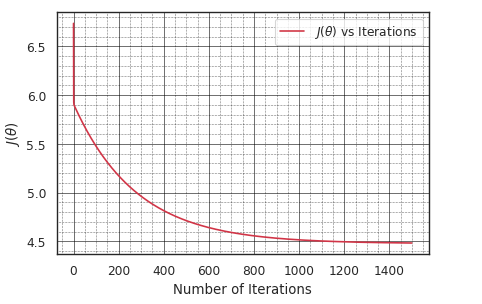

In [3]:
from IPython.display import Image
Image("/home/anil/ML/ML_1/Machine-Learning-Digital-Book-/Linear Regression With Multiple Variable/LRWM.png",width=500,height=300)

Plotting $J({\theta})$ also tells you whether or not the gradient descent has converged. Different problems require different number of iterations until convergence, so in general you can assume that the algorithm has found a minimum when $J({\theta})$ decreases less than some small value ϵ in one iteration.

Choosing a proper value $\epsilon$  is not an easy task. Some people set it to value $10^{−3}$ and also automatize the task in what is called **automatic convergence test: their algorithm stops when $J({\theta})$  has decreased less than $\epsilon$ in one iteration.**

But it is always good to plot and check the convergence.

## 7.Choose the best values for $\alpha$ <a class="anchor" id="7">
    
If your $J({\theta})$ plot seen before starts to look weird — upward curves, dramatically slow decreasing, ... — the gradient descent is not working properly: it is time to fix $\alpha$, by using a smaller value.

It has been proved mathematically that for sufficiently small $\alpha $, $J({\theta})$ decreases on every iteration. On the other hand if $\alpha $ is too small the gradient descent can be slow to converge.

The rule of thumb here is to try a range of $\alpha $ values. Start with $\alpha=0,001$ and look at the $J({\theta})$ plot. Does it decrease properly and rapidly? You are done with it. Otherwise, switch to $\alpha=0,01 (×10 scale)$, rinse and repeat until the algorithm works fine.

## 8.Over-fitting & Regularization. <a class="anchor" id="8">
    
By now in our First approach to machine learning series we have written about two of the most famous building block algorithms: [Simple linear regression](https://github.com/AnilSarode/Machine-Learning-Digital-Book-/blob/master/Simple%20Linear%20Regression/Simple%20Linear%20Regression%20.ipynb) and [logistic regression](https://github.com/AnilSarode/Machine-Learning-Digital-Book-/blob/master/Logistic_Regression/Logistic%20Regression%20or%20Classification.ipynb). We know they can be very powerful yet, as the number of features increase, they might both suffer of a common problem: overfitting. Let's take a closer look at it.

Consider the same example of the Height prediction from the Weight of the mice as shown:

![data](bias0.png)

![data](bias1.png)

Ideally,we would know exact mathematical formula that describe the relationship between height and weight as shown above.but in this case we do not know the exact formula.So we are going to use Machine learning methods to approximate the relationship.so let the true relationship be as it is and we split the data into two sets training(**Blue dot**) and test(**Green dot**).
![data](bias2.png)

The first ML algorithm that we will use is Linear Regression also known as Least Square.Linear Regression fit a straight line to the training data.Note that the straight line does not have the flexibility to accurately replicate the arch in the true relationship. 
![data](bias3.png)

No matter how we fit the line it will never curve.Thus the **straight line** will never capture the true relationship between weight and height,no matter how we fit it to training set.The inability of the machine learning method to capture the true relation ship is called **Bias**.Because the straight line can't be curve like true relationship,it has relatively large amount of bias.

Another ML method might fit **Squiggly line** to the training set as shown.The squiggly line is super flexible and hug the training set along the arch of true relationship.Because the squiggly line can handle the arch in the true relationship between weight and height.it has very little bias.
![data](variance.png)

We can compare how well the **Straight line** and **Squiggly line** fit the training set by estimating their sum of square errors.In other words we measure the distance from the fit line to the data,square them and add them.
![data](var0.png)
Notice that the squiggly line fit the data so well that the distance between the line and the data is zero.In the contest see whether Straight line fits the training data better than squiggly line,squiggly line wins.But remember so far we are dealing with only training set, also have the test set.Now estimate the sum of square with the test set.
![data](var1.png)

In this contest the straight line wins.Even though the squiggly line did great job fitting the training set it perform terribly job while fitting the testing set.In Machine learning Lingo this difference is call as **Variance**.The squiggly line has low **bias** as it is flexible and can adopt the curve in relationship between  weight and height but it has high variability cause it result in large sum of square error for the new data set.In other words it is hard to predict how well the squiggly line perform on new data set.It might do well some time or it might do worst sometimes. 
![tdata](Nvar.png)


In contrast, the straight line has relatively **High bias** as it is not able to capture the curve in relationship between  weight and height but it has **low variance** cause it result in small sum of square error for new data set.In other words the straight line will do good prediction but not great prediction,but there will be consistently good prediction.
![data](var3.png)

Because the **Squiggly line fits the training set really well but Not the testing set** the squiggly line is said to be **OVER-FIT**.

In machine learning,the ideal algorithm has **low biased** can accurately model the true relationship as shown.
below red line fit.
![data](var4.png)

and it has **low variability**,by consistent predictions across the different data set as shown below.
![data](var5.png)

This is done by finding the sweet-pot between the simple model of straight line and the complex polynomial fit.This is done by **Regularization parameter in the cost function.**
![data](var6.png)

In above fig the the straight line fit is also called under-fit. and in terms of our house prediction example we can imagine this concept as:**Over-fitting**, or high variance, happens when your hypothesis function $h_{\theta}(x)$ tries too hard to fit the training set. The result is that the learned hypothesis function will work great with the training set you initially provided, but will fail to generalize new examples.

Your algorithm can also face the opposite problem, called called **underfitting**, or high bias: the hypothesis function doesn't fit much well the data you have provided in the training stage.
![data](var7.png)

Above depicts two cases of wrong fitting during a linear regression task. The top-left plot shows underfitting: the hypothesis function is a linear one, which doesn't fit so well the data. The top-right plot shows a quadratic function: visually it seems to generalize data pretty well. This is the way to go. The last plot at the bottom shows instead an example of overfitting, where the curve does touch all the points in the training examples (which is good), but with too much juggling. Such hypothesis function will struggle to predict new prices if fed with new examples outside the training set.

Thanks to this video lecture[StatQuest with Josh Starmer](https://www.youtube.com/watch?v=EuBBz3bI-aA).

## 9.How to limit over-fitting ?<a class="anchor" id="9">

In a perfect universe your machine learning problem deals with low-dimensional data, that is few input parameters. This is something we saw earlier in our house price prediction examples: we only had "size" and "price" parameters back then, producing a straightforward 2-D plot. Finding overfitting is easy here: just plot the hypothesis function and adjust the formula accordingly.

However this solution is impractical when your learning problem deals with lots (hundreds) of features. There are two main options here:

**Reduce the number of features** — you manually look through the list of features and decide what are the most important ones to keep. A class of algorithms called model selection algorithms automatically select the most relevant features: we will take a look at it in the future chapters. Either way, reducing the number of features fixes the overfitting problem, but it is a less than ideal solution. The disadvantage is that you are throwing away precious information you have about the problem.

**Regularization** — you keep all the features, but reduce the magnitude (i.e. the value) of each parameter ${\theta}_j$. This method works well when you have a lot of features, each of which contributes a bit to predicting the output $y$. Let's take a look at this technique and apply it to the learning algorithms we already know, in order to keep overfitting at bay.




## 10.A regularized cost function <a class="anchor" id="10">

Say we have two hypothesis functions from the same data set (take a look at above picture. as a reference): the **first one** is $h_{\theta}(x)={\theta}_0 +{\theta}_1x_1+{\theta}_2x^{2}_2$ and it works well; the **second one** is h$h_{\theta}(x)={\theta}_0 +{\theta}_1x_1+{\theta}_2x^{2}_2+{\theta}_3x^{3}_3+{\theta}_4x^{4}_4$ and it suffers from overfitting. The training data is the same, so the second function must have something wrong in its formula. It turns out that those two parameters ${\theta}_3$ and ${\theta}_4$ contribute too much to the curliness of the function.

The core idea: penalize those additional parameters and make them very small, so that they will contribute less, or even don't contribute at all to the function shape. If we set ${\theta}_3 \approx 0$ and${\theta}_4 \approx 0$  (in words: set them to very small values, next to zero) we would basically end up with the first function, which fits well the data.

A real implementation of a regularized cost function pushes the idea even further: all parameters values are reduced by some amount, producing a somehow simpler, or smoother hypothesis function (and it can be proven mathematically).

For example, say we are working with the usual linear regression problem of house price prediction. We have:

* 100 features: $x_1,x_2...,x_{100} $ (size, number of floors, ...) that produce...
* 100 parameters: ${\theta}_0$,${\theta}_1$...${\theta}_{100}$

Of course is nearly impossible to know which parameter contributes more or less to the overfitting issue. So in regularization we modify the cost function to shrink all parameters by some amount.

The original cost function for linear regression is:

$$  
J({\theta}) = \frac{1}{2m} \sum_{i=1}^m(h_{\theta}(x^{(i)} )-y^{(i)})^2 
$$ 

The regularized version adds an extra term, called regularization term that shrinks all the parameters:

$$  
 J({\theta}) = \frac{1}{2m} [\sum_{i=1}^m(h_{\theta}(x^{(i)} )-y^{(i)})^2 + \lambda\sum_{j=1}^n{\theta}^{2}_j]
$$ 
The lambda symbol $\large\lambda$ is called the regularization parameter and it is responsible for a trade-off between fitting the training set well and keeping each parameter small. By convention the first parameter ${\theta}_0$ is left unprocessed, as the loop in the regularization term starts from $1$ (i.e. $j=1$).

The regularization parameter must be chosen carefully. If its too large, it will crush all the parameters except the first one, ending up with a hypothesis function like  $h_{\theta}(x)={\theta}_0 $ where all other ${\theta}s$ are next to zero. Such function is a simple horizontal line, which of course doesn't fit well the data (and suffers from underfitting).

There are some advanced techniques to find the regularization parameter automatically. We will take a look at some of those in future episodes. For now, let's see how to apply the regularization process to linear regression and logistic regression algorithms.

## 11.Regularized linear regression<a class="anchor" id="11">

In order to build a regularized linear regression, we have to tweak the gradient descent algorithm. The original one, outlined in a previously looked like this:

simultaneously update the the ${\theta}_j $ for $ j= 0,....n $

repeat until  converges

{

$
\large {\theta}_0:={\theta}_0- \large\alpha\frac{1}{m} \sum_{i=1}^m(h_{\theta}(x^{(i)} )-y^{(i)})(x^{(i)}_0) 
$

$
\large {\theta}_j:={\theta}_j- \large\alpha\frac{1}{m} \sum_{i=1}^m(h_{\theta}(x^{(i)} )-y^{(i)})(x^{(i)}_j) 
$

}

Nothing new, right? The derivative at this point has been already computed and we plugged it into the formula. In order to upgrade this into a regularized algorithm, we have to figure out the derivative for the new regularized cost function seen above.This is how it looks like:

$$
\frac{\partial J_{Reg}({\theta})}{\partial {\theta}_j}= \frac{1}{m} \sum_{i=1}^m(h_{\theta}(x^{(i)} )-y^{(i)})(x^{(i)}_j)  + \frac{\lambda}{m}\sum_{j=1}^n{\theta}_j
$$

And now we are ready to plug it into the gradient descent algorithm. Note how the first ${\theta}_0$ is left unprocessed, as we said earlier:

repeat until  converges

{

$
\large {\theta}_0:={\theta}_0- \large\alpha\frac{1}{m} \sum_{i=1}^m(h_{\theta}(x^{(i)} )-y^{(i)})(x^{(i)}_0) 
$

$
\large {\theta}_j:={\theta}_j- \large\alpha[\frac{1}{m} \sum_{i=1}^m(h_{\theta}(x^{(i)} )-y^{(i)})(x^{(i)}_j)+\frac{\lambda}{m}{\theta}_j]
$

}

We can do even better. Let's group all the terms together that depends on ${\theta}$ (and ${\theta}_0$ left untouched as always):
$
\begin{align*} & \text{repeat until convergence:} \; \lbrace \newline \; & 
\theta_0 := \theta_0 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_0^{(i)} \newline \; & 
\cdots  \newline \; & 
\theta_j := \theta_j(1 - \alpha \frac{\lambda}{m}) - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)} & \newline 
\rbrace \end{align*}
$

I have simply rearranged things around in each ${\theta}_j$update, except for ${\theta}_0$. This alternate way of writing shows the regularization in action: as you may see, the term $(1 - \alpha \frac{\lambda}{m})$ multiplies ${\theta}_j$ and it's responsible for its shrinkage.i.e. the ${\theta}_j < 1 $ always. The rest of the equation is the same as before the whole regularization thing.

You can learn more about the Ridge,lasso and ElasticNet Regression for regularization from the [here](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)

## 12.Linear regression with multiple variables  <a class="anchor" id="12">
    
In this part, We will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices. The file `kc_house_data.csv`obtain from [kaggle](https://www.kaggle.com/mayanksrivastava/predict-housing-prices-simple-linear-regression).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read comma separated data and give the proper names to the columnes
df = pd.read_csv('/home/anil/ML/ML_1/Machine-Learning-Digital-Book-/Linear Regression With Multiple Variable/kc_house_data.csv')#,index_col=False)

In [5]:
df.head() # First five rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.shape

(21613, 21)

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## 12.1 Data segregations <a class="anchor" id="12.1">
    
As evidence from above five rows the data the column `id`,`date`,`zipcode` does not contribute to our prediction model.Which we can decide manually. But what about other features, you may have following question 

Which features are relevant and irrelevant for price prediction?

To know that we plot the correlation matrix for our data set and it is most commonly done using Pearson correlation.To know more about feature selection you can read [this](https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b).But before that we drop `id`,`date`,`zipcode` columns.

In [8]:
df.drop(["id","date","zipcode"],axis=1,inplace=True)

In [9]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


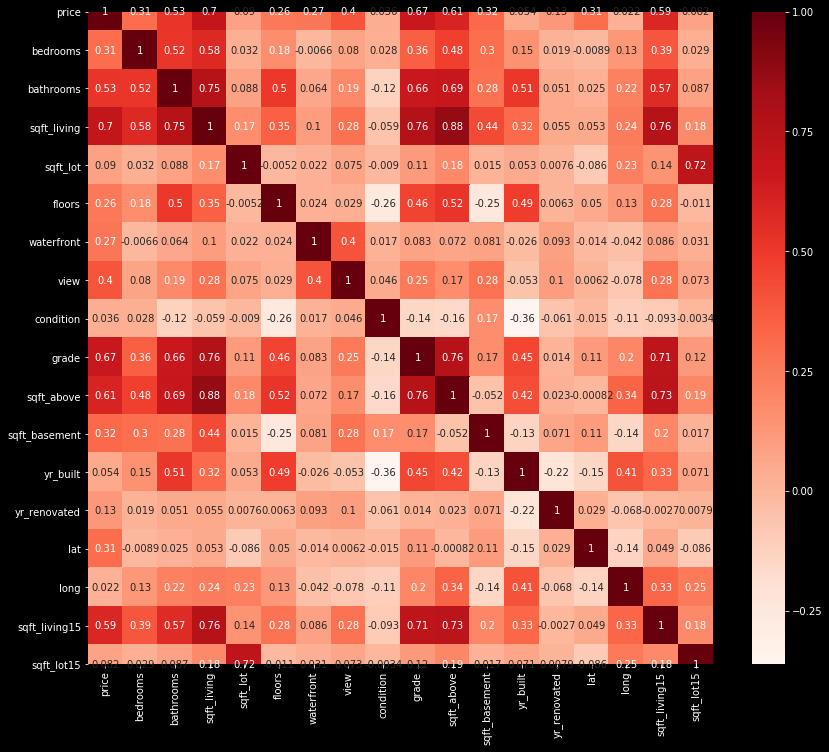

In [10]:
#Using Pearson Correlation
import seaborn as sns
plt.style.use("dark_background")
#sns.set_style("darkgrid")
#sns.set()""
plt.figure(figsize=(14,12))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

From above heat map shows the correlation for our data set after removing these `id`,`date`,`zipcode` features.You can see the correlation by the darkness of the red color or the number inside the box,more the number tends towards `+1` or `-1` more the features is correlated with each others and vice-versa.  

So now let's select the features which are more relevant or more correlated to the `price`.We set the threshold of `0.085` i.e. the features which have correlation value $> 0.085$ are consider.


In [11]:
#Correlation with output variable
cor_target = abs(cor["price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.085]
relevant_features

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_renovated     0.126434
lat              0.307003
sqft_living15    0.585379
Name: price, dtype: float64

As we can see the `bedrooms,long','view','bathrooms','sqft_living','grade','sqft_living15','sqft_above','lat',sqft_basement`,`yr_renovated`,`sqft_lot`,`floors`,`waterfront` are more correlated to price according set threshold `0.0085`. 

Now let's drop the values of the `price` and consider it as target vector `Y`.Also consider only above relevant  features.  

In [12]:
Y=df['price']

In [13]:
df.drop(["price"],axis=1,inplace=True)

In [14]:
df.shape

(21613, 17)

In [15]:
#feartues=['bedrooms','view','bathrooms','sqft_living','grade','sqft_living15','sqft_above','lat','sqft_basement']
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','grade','sqft_above','sqft_basement','yr_renovated','lat','sqft_living15']

In [16]:
df1=df[features]

In [17]:
df1.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15
0,3,1.00,1180,5650,1.0,0,0,7,1180,0,0,47.5112,1340
1,3,2.25,2570,7242,2.0,0,0,7,2170,400,1991,47.7210,1690
2,2,1.00,770,10000,1.0,0,0,6,770,0,0,47.7379,2720
3,4,3.00,1960,5000,1.0,0,0,7,1050,910,0,47.5208,1360
4,3,2.00,1680,8080,1.0,0,0,8,1680,0,0,47.6168,1800


In [18]:
df1.shape

(21613, 13)

As we use `scipy.optimize` an inbuilt package of python  in [logistic Regression ](https://github.com/AnilSarode/Machine-Learning-Digital-Book-/blob/master/Logistic_Regression/Logistic%20Regression%20or%20Classification.ipynb) to find the optimum parameters, here we use [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) or more specifically[sklearn.linear_model.Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)or [sklearn.linear_model.Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)or [sklearn.linear_model.ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet).

As per our notations we have $m=21613$ examples or data points for $n=9$ features. Convert the `Pandas dataframe` into a `numpy array`.Then split the data into a training set`(80%)` and test set`(20%)`. 

In [19]:
df1=df1.to_numpy() # Pandas dataframe to numpy array.
Y=Y.to_numpy()

In [20]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(df1, Y, test_size=0.3, random_state=0)

In [21]:
#X_train.shape
X_test[:,0]

array([2., 4., 2., ..., 3., 3., 3.])

## 12.2 Feature scaling <a class="anchor" id="12.2">
    
Here we will scale our training set by the mean-normalization.


In [22]:
print('\n',Mean_norm.fit(X_train))
print('\n',Mean_norm.fit(X_test))
X_train = Mean_norm.transform(X_train)
X_test = Mean_norm.transform(X_test)


 StandardScaler(copy=True, with_mean=True, with_std=True)

 StandardScaler(copy=True, with_mean=True, with_std=True)


In [23]:
X_test[:,0]

array([-1.54541664,  0.68905353, -1.54541664, ..., -0.42818155,
       -0.42818155, -0.42818155])

In [24]:
np.var(X_test[:,0])

1.0000000000000215

In [25]:
cls = Ridge(alpha=1e-18, fit_intercept=True, normalize=False, copy_X=True, max_iter=1500, tol=0.001, solver='sparse_cg', random_state=None)
cls.fit(X_train,y_train)


Ridge(alpha=1e-18, copy_X=True, fit_intercept=True, max_iter=1500,
      normalize=False, random_state=None, solver='sparse_cg', tol=0.001)

In [26]:
prediction = cls.predict(X_test)


In [27]:
#Parameters used for the model 
cls.get_params()

{'alpha': 1e-18,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1500,
 'normalize': False,
 'random_state': None,
 'solver': 'sparse_cg',
 'tol': 0.001}

In [28]:
print('Co-efficient of linear regression',cls.coef_)

Co-efficient of linear regression [-19570.27296695  -6265.63956129  86304.14171242  -3044.21110123
 -12958.72270932  47399.43777912  49631.24310666  96137.08086624
  72998.45674987  41747.073267    20976.67779858  92646.31077342
   9670.32103787]


In [29]:
print('Intercept of linear regression model',cls.intercept_)

Intercept of linear regression model 541592.8583218027


In [30]:
print('Mean Square Error:', metrics.mean_squared_error(y_test, prediction))


Mean Square Error: 48056857201.33885


In [31]:
y_pred=prediction

In [32]:
df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1

,Actual,Predicted
0,297000.0,4.415624e+05
1,1578000.0,1.393231e+06
2,562100.0,4.648840e+05
3,631500.0,4.718624e+05
4,780000.0,1.077308e+06
...,...,...
6479,1100000.0,4.341031e+05
6480,700000.0,5.745473e+05
6481,380000.0,4.282821e+05
6482,268000.0,2.439289e+05


In [33]:
print('Training score: {}'.format(cls.score(X_train, y_train)))
print('Test score: {}'.format(cls.score(X_test, y_test)))


Training score: 0.666790921579142
Test score: 0.6499659548252884


The significance of the $R^2$ value is explain in [Simple Linear Regression](https://github.com/AnilSarode/Machine-Learning-Digital-Book-/blob/master/Simple%20Linear%20Regression/Simple%20Linear%20Regression%20.ipynb) in module 10.Linear Regression from Statistical point of view and Least Square.So here score tells us that our selected features explain $65\%$ variation in the **price** value for the test set. 

## References <a class="anchor" id="13">
 
   * [1] [Coursera ML course by Andrew Ng.](https://www.youtube.com/watch?v=Q4GNLhRtZNc&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN&index=18)
   * [2] [Bishop - Pattern Recognition And Machine Learning - Springer 2006](https://www.academia.edu/17851990/Bishop_Pattern_Recognition_and_Machine_Learning)
   * [3] [ StatQuest with Josh Starmer.](https://www.youtube.com/channel/UCtYLUTtgS3k1Fg4y5tAhLbw)
   * [4] [Multivariate linear regression](https://www.internalpointers.com/post/multivariate-linear-regression)
   * [5] [The problem of overfitting in machine learning algorithms](https://www.internalpointers.com/post/problem-overfitting-machine-learning-algorithms)
   * [6] [towards Data science](https://towardsdatascience.com/regression-using-sklearn-on-kc-housing-dataset-1ac80ca3d6d4)